# Introduction

Primary data sources on population are a rare resource in developing countries. When existant, civil registration systems are often patchy. Censuses are rare, and at best happening every 10 years. Meanwhile, in countries with democratic constitutions, elections are held on a more frequent basis. In West Africa, most Constitutions require elections for higher offices to be held every five years. Each time elections are held, voting lists have to be updated, to enlist new voters, and distribute voting identifications. Voters lists should record every person allowed to vote in a country, which can in most situation be equated to the adult population. In this regard, voters list could constitute an interesting data source, providing a regular update on the adult population of a country.

In 2015 and 2016, [27 african countries have planned presidential elections](http://libeafrica4.blogs.liberation.fr/2016/04/20/peut-en-cartographier-2016-la-grande-annee-electorale-en-afrique/), and more have planned local or legislative elections (list [for 2015](http://www.jeuneafrique.com/43179/politique/carte-interactive-o-et-quand-se-tiennent-les-lections-de-2015-en-afrique/) and [for 2016](http://www.jeuneafrique.com/mag/284560/politique/carte-elections-a-venir-afrique-cest-lalternance/). Some researchers and journalists have questioned the [credibility and regularity of some of these elections](http://www.lam.sciencespobordeaux.fr/page/afrique-presidentielles), as they question the way electoral lists are designed, suspecting partisan biases in the way voters are identified and registered. Meanwhile the systematic registration and identification of a sizeable chunk of populations, even if imperfect, should be considered as a huge opportunity to get or update data on these populations.

The update of electoral lists is indeed often a conflictual and highly politicized process. In African countries where vote is often overdetermined by geographic and ethnic origins of voters, suspicions of fraud are frequent, with under recording of some categories of voters, and over recording of other categories. Meanwhile, with the development of [better techniques for voters identification](https://regardexcentrique.wordpress.com/2015/06/10/la-biometrie-electorale-en-afrique-dossier/#_ftn1), and with the development of supervision by civil societies and international agencies, one can hope the completeness and quality of voters lists should be acceptable. Moreover, in order to improve transparence of electoral processes, voters lists are often made available for the public to control and correct.

## The Niger 2016 elections

In Niger, presidential and parlementary elections were held in February 2016. Voters lists were updated during the second half of the year 2015, under the supervision and control of a mission of the Office International de la Francophonie (OIF). The operations for registration of voters [were conducted during the third quarter of 2015](http://www.ceni-niger.org/article-region/#more-24). A first version of the voters list was [published on December 21, 2015](http://www.ceni-niger.org/article-region/#more-24), tallying 7,569,172 voters, out of 8,569,309 that were expected [based on the 2012 census](http://www.iinanews.org/page/public/news_details.aspx?id=98929&NL=True#)

Final lists were validated in early January 2016 after [being corrected](http://www.nigerdiaspora.net/les-infos-du-pays/politique-niger/politique-niger/item/72543-synthese-du-rapport-de-l-audit-du-fichier-electoral-le-guri-systeme-a-visage-decouvert-adieu-le-coup-k-o) for [some incoherencies](http://www.nigerinter.com/2016/01/le-fichier-electoral-du-niger-valable-sous-reserves/) noted by the supervisory body. [A final report on these lists](http://www.nigerinter.com/2016/05/remise-officielle-du-rapport-du-fichier-electoral-au-ministre-detat-a-linterieur-par-le-cfeb/) was published in may 2016. 

The Comission Electorale Nationale Independante (CENI) later made these lists fully available on its website.

This work purposes to evaluate how the information made available in voters lists compares with other data sources on Nigerien's population, and how it brings additional knowledge on this population.

# Data

Two main data sources are used in this work :
1. The list of electors, extracted from the CENI website
2. A repertoire of all localities in Niger and their population, produced during Niger's latest Census. This repertoire contains GPS localization as reported by the census teams for each locality. 

## Voters List

The voters' list was extracted from the [CENI's website](http://www.ceni-niger.org/) using Python's web extraction package _BeautifulSoup_. The extraction first navigated the CENI's website to get the hierarchy of Regions, Departments, Communes and Voting Stations. In a second step, each voting station voting list was read and saved in tabular format in separate files. The lists were then anonymized and compiled in a central file. 

For each voter, the covariates collected were : voting stations, commune, department and region, date of birth, profession. 

Data was obtained for 7,617,613 voters.


## Census / Répertoire National des Localités

The _Répertoire National des Localités_ (RENALOC) was downloaded as a pdf file from the [Institut National de la Statistique (INS) website](http://www.stat-niger.org/). The tables were extracted in bulk from this file using the Tabula Package, and then processed in Python to recompose the geographic structure of the document.

The final data consists in 34507 localities, for which the INS provides the number of inhabitants, by gender, as well as the number of households, and the number of agricultural households. For most of the localities, a GPS coordinate is recorded, as well as the type of locality (neighborhood, village, camp, water well, hamlet).

## Additional Data sources

Administrative boundaries for regions and departements were retrieved from the CENI's website. Boundaries for communes were retrieved from colleagues.

## Data Matching

All data sources (voters list, RENALOC, administrative boundaries) have been matched at commune level. For mapping purposes, some urban areas had to be collapsed at city level.

## Mapping the elections

The availability of voting list at a low level of granularity allows us to map the results of the election at a very local level. We can see a clear regional pattern of votes in Niger. Some proeminent candidates such as the incumbent candidate Mahamadou Issoufou or other former presidents have a notoriety that goes beyond their home region and their constituency. Some smaller candidates have voters in only very limited regions and get most of their votes from these constituencies. Hama Amadou, who came second on the first round of votes, got most of his votes from the Tillabery region where he comes from.

# Methods

The quantity of interest for us is the total population in different communes. We denote this population in commune $c$ as $Y_c$. Our main covariate to predict this population is the number of registered adults on voting lists, which we denote $vot_c$. There are two parts of the total population that are not tallied in voters lists:

1. __Non adult population :__ Non adults are not eligible to vote and should thus not be registered on the voters list.
2. __Unregistered adults :__ Some adults are not registered on voting lists for different reasons (see infra).

We model the population of commune $c$ as :

$$Y_c = N(\beta_0 + \beta_r + \beta_1 f(v_c) + \beta_2 sr_c + \beta_3 urb_c + \beta_4 age_c  + \beta_5 vot_c)$$

With :
* $\beta_0$ a constant 
* $\beta_r$ a regional fixed effect
* $f_c(v_c)$ a transformation of the number of registered voters to impute non adult population. This imputation is made at commune level using splines
* $sr_c$ the percentage of women in the commune
* $urb_c$ a dummy variable depicting wether the commune is a urban commune or not (aka arrondissement
* $age_c$ is the average age in the commune
* $vot_c$ is the number of people registered on the voting lists who actually voted in the first round of the presidential election 

We first get the distributions of ages in each commune. As only adults are registered on voting lists, we have to impute the distribution of younger age groups. We do so by fitting a spline on the proportion of voters of each age. To obtain the uncertainty this imputation, we use boostrap, and resample the voter list at commune level. We thus estimate $f(vot_c)$ as :

$$f(vot_c) = N(v_c + vot^{*}_{k})$$

Where $vot^{*}_{k}$ is the imputed number of non adults in the commune.

Different hypothesis can be made on how voters lists relate to local population :
* __Ecological bias :__  some populations are easier to register in voters lists. Most importantly, nomadic populations are by definition more mobile, and are harder to register than more sedentary populations.
* __Geographical bias :__ different teams or administrations will have been involved in registering different voters. Thus, there may be variations in registration rates in different 

In [1]:
## Usual Suspects
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import numpy as np
import pickle

import json
import warnings
from collections import OrderedDict

import xarray as xr
import holoviews as hv
import geoviews as gv
import iris
import cartopy

from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf

hv.notebook_extension('bokeh','matplotlib')

## IPython Display settings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

## Voters original data
voters_data = pd.read_csv('../../data/processed/voters_list.csv' , encoding = "ISO-8859-1")
voters_data = voters_data[(voters_data.age >= 18) & (voters_data.region != 'DIASPORA')]

## Splined data
#bootstrapped_splines = pickle.load( open( "../../data/processed/bootstraped_splines.p", "rb" ) )
#age_structure = bootstrapped_splines['age_structure']
#splined_data = bootstrapped_splines['splined_data']
#confidence_interval_spline = bootstrapped_splines['confidence_intervals']

## Données carto
shapefile = cartopy.io.shapereader.Reader('../../data/external/commune_shp/nigcom.shp')

## Featured data
data = pd.read_csv('../../data/processed/commune_collapsed_matched.csv')
data['GPS_ID'] = data.GPS_ID.astype(int)

model_data = pd.read_csv('../../data/processed/model_data.csv' , encoding = "ISO-8859-1")

# Results
## Population Size estimation

We first fit a simple model of commune population to all data extracted from the electoral process.  

<IPython.core.display.Javascript object>


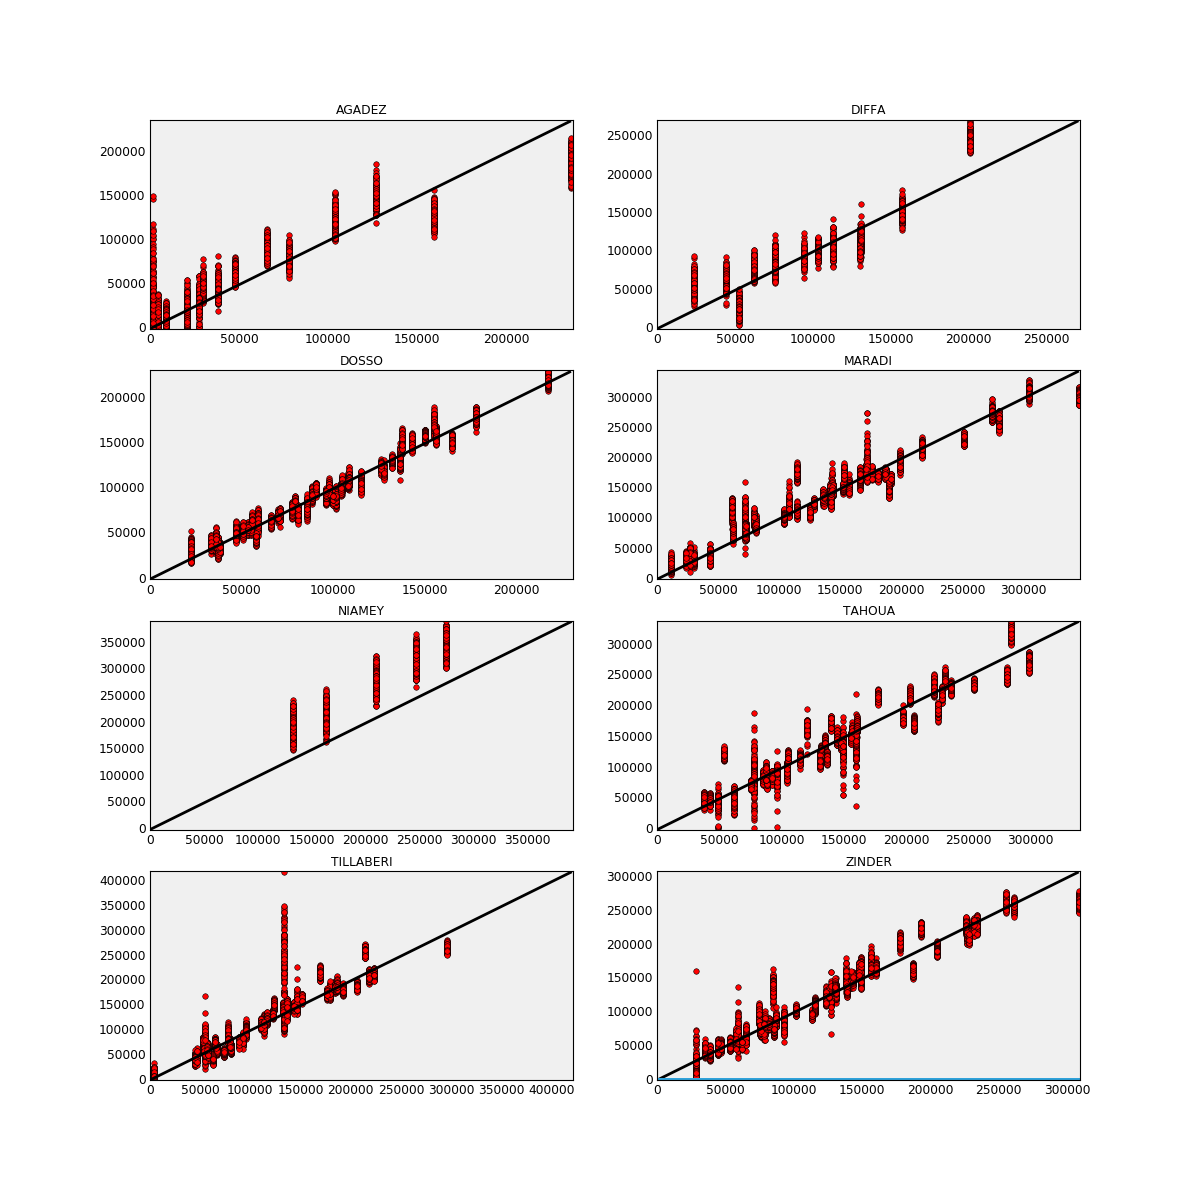

In [2]:
nrow = 4
ncol = 2

f, axarr = plt.subplots(nrow, ncol,figsize=(15,15))
col = row = 0
for region in list(sorted(model_data['region'].unique())) :
    axarr[row , col].plot(model_data.population_census[model_data['region'] == region] , 
                          model_data.prediction[model_data['region'] == region], 'ro', ms=5 )
    axarr[row , col].plot([0 , max([max(model_data.population_census[model_data['region'] == region]) , max(model_data.prediction[model_data['region'] == region])])] , 
                          [0 , max([max(model_data.population_census[model_data['region'] == region]) , max(model_data.prediction[model_data['region'] == region])])] ,'k-')
    axarr[row , col].set_xlim(0,(max([max(model_data.population_census[model_data['region'] == region]) , max(model_data.prediction[model_data['region'] == region])]) + 1000))
    axarr[row , col].set_ylim(0,(max([max(model_data.population_census[model_data['region'] == region]) , max(model_data.prediction[model_data['region'] == region])]) + 1000))
    axarr[row , col].set_title(region)
    col = col + 1
    if col > (ncol - 1) :
        col = 0
        row = row + 1 

In [26]:
def rmse(data):
    return (data.population_census - data.prediction )/ data.population_census

model_data['rmse'] = rmse(model_data)

model_data.rmse[model_data.rmse > 1] = 1
model_data.rmse[model_data.rmse < -1] = -1
data_map = hv.Dataset(model_data)

We will now look at how the error in prediction is distributed in the Nigerien territory. Figure 3 allows us to confirm the rmse varies heavily with the size of population, as we should have expected. Map 1 also shows we can find no evidence of geographical clustering of the variation, meaning our model performs equally well in different zones. WE SHOULD SEE REGIONAL FIXED EFFECTS TO CHECK FOR REGIONAL EFFECTS.

<IPython.core.display.Javascript object>


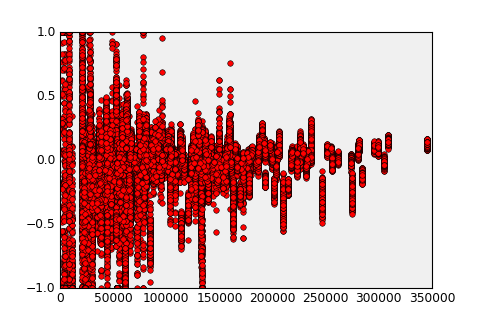

In [27]:
p = plt.figure()
p = plt.plot(model_data.population_census , model_data.rmse , 'ro', ms=5 )

In [5]:
%%output backend='bokeh'
%%opts Shape (cmap='Oranges') [xaxis=None yaxis=None tools=['hover'] width=750 height=750]
gv.Shape.from_records(shapefile.records(), data_map, on='GPS_ID', value='rmse',
                     index=['region' , 'departement' , 'GPS_NAME'], crs=crs.PlateCarree())

b':NdOverlay   [region,departement,GPS_NAME]\n   :Shape   [Longitude,Latitude]   (rmse)'

In [6]:
def get_boot_95(data):
    q025 = data.prediction.dropna().quantile(0.025)
    q500 = data.prediction.dropna().quantile(0.5)
    q975 = data.prediction.dropna().quantile(0.975)
    return pd.DataFrame({'q025':q025 , 'q500':q500 , 'q975':q975} , index = [1])

In [7]:
def coverage_95(data):
    data = data.iloc[0]
    data['cov_ic95'] = ((data['q025'] < data['population_census']) & (data['q975'] > data['population_census']))
    return data

In [8]:
levels= ['region' , 'departement' ,  'commune']

cov95 = model_data.groupby(levels).apply(get_boot_95)
cov95 = cov95.reset_index()
del cov95['level_'+str(len(levels))]
cov95 = pd.merge(model_data , cov95 , left_on = levels , right_on = levels , how = 'inner')

In [9]:
cov = cov95.groupby(levels).apply(coverage_95)

In [10]:
def coverage(data):
    return data['cov_ic95'].sum() / len(data)

In [11]:
cov.groupby(['region']).apply(coverage)

region
AGADEZ       0.600000
DIFFA        0.500000
DOSSO        0.651163
MARADI       0.600000
NIAMEY       0.000000
TAHOUA       0.511628
TILLABERI    0.577778
ZINDER       0.666667
dtype: float64

## Finer scale mapping

## Comparison with Afripop Data estimations

In [12]:
world_pop_communes = pd.read_csv('../../data/processed/worldpop_communes.csv')
del world_pop_communes['Unnamed: 0']
world_pop_communes.columns = ['population_worldpop' , 'GPS_ID']

In [13]:
model_data_full = pd.merge(model_data , world_pop_communes , on = 'GPS_ID' , how = 'inner')

<IPython.core.display.Javascript object>


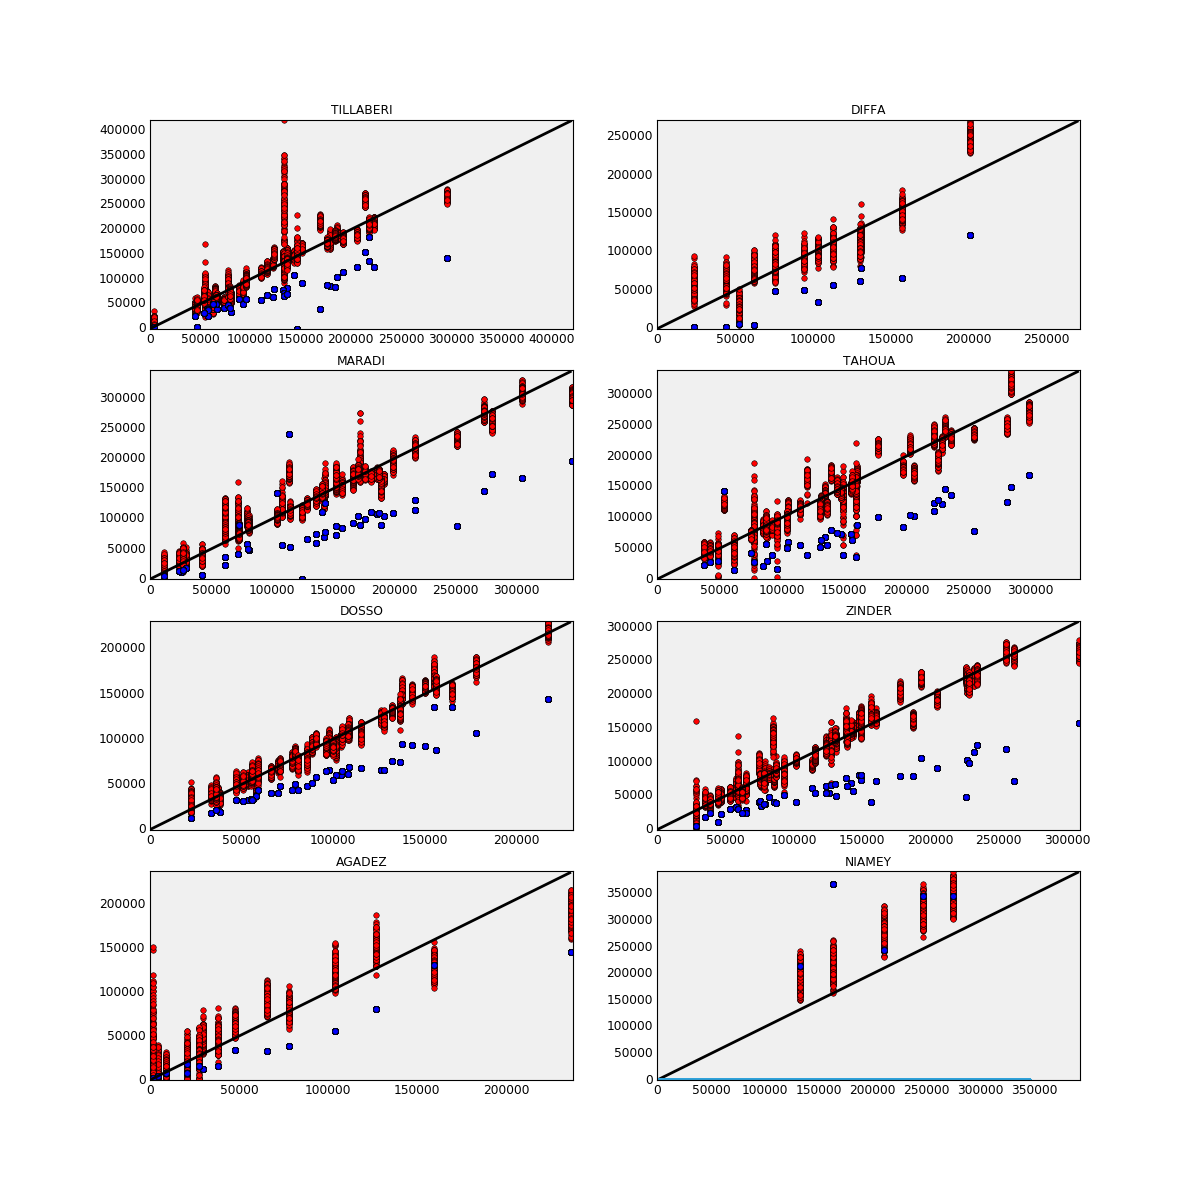

In [14]:
nrow = 4
ncol = 2

f, axarr = plt.subplots(nrow, ncol,figsize=(15,15))
col = row = 0
for region in list(model_data_full['region'].unique()) :
    axarr[row , col].plot(model_data_full.population_census[model_data_full['region'] == region] , 
                          model_data_full.prediction[model_data_full['region'] == region], 'ro', ms=5 )
    axarr[row , col].plot(model_data_full.population_census[model_data_full['region'] == region] , 
                          model_data_full.population_worldpop[model_data_full['region'] == region], 'bo', ms=5 )
    axarr[row , col].plot([0 , max([max(model_data_full.population_census[model_data_full['region'] == region]) , 
                                    max(model_data_full.prediction[model_data_full['region'] == region])])] , 
                          [0 , max([max(model_data_full.population_census[model_data_full['region'] == region]) , 
                                    max(model_data_full.prediction[model_data_full['region'] == region])])] ,'k-')
    axarr[row , col].set_xlim(0,(max([max(model_data_full.population_census[model_data_full['region'] == region]) , 
                                      max(model_data_full.prediction[model_data_full['region'] == region])]) + 1000))
    axarr[row , col].set_ylim(0,(max([max(model_data_full.population_census[model_data_full['region'] == region]) , 
                                      max(model_data_full.prediction[model_data_full['region'] == region])]) + 1000))
    axarr[row , col].set_title(region)
    col = col + 1
    if col > (ncol - 1) :
        col = 0
        row = row + 1 

## Age structure reconstitution

In [ ]:
nrow = 38
ncol = 7

if plotting == True :
    f, axarr = plt.subplots(nrow, ncol,figsize=(80,400))
    col = row = 0
    for num in list(confidence_interval_spline.index) :
        extr = confidence_interval_spline.iloc[num]
        commune = extr['commune']
        
        x_splined = list(range(len(extr['IC95']['extrapolation_5']) , 101))
        x_extrapol = list(range(0 , len(extr['IC95']['extrapolation_5'])))
        
        ## Plot age structure for complete data
        axarr[row , col].plot(age_structure[(age_structure.commune == extr['commune']) & 
                                            (age_structure.region == extr['region'])].age , 
                              age_structure[(age_structure.commune == extr['commune']) & 
                                            (age_structure.region == extr['region'])].percentage, 'ro', ms=5 )
        
        ## Plot splined confidence interval
        axarr[row , col].plot(x_splined , list(extr['IC95']['splining_5']), 'b', lw=3, ls = 'dashed')
        axarr[row , col].plot(x_splined , list(extr['IC95']['splining_95']), 'b', lw=3, ls = 'dashed')
        
        ## Plot splined extrapolation
        axarr[row , col].plot(x_extrapol , list(extr['IC95']['extrapolation_5']), 'g', lw=3 , ls = 'dashed')
        axarr[row , col].plot(x_extrapol , list(extr['IC95']['extrapolation_95']), 'g', lw=3 , ls = 'dashed')
        
        axarr[row , col].set_title(commune)
        col = col + 1
        if col > (ncol - 1) :
            col = 0
            row = row + 1 


## Population Prediction

# Next steps